<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

df = pd.read_csv("MERGED2022_23_PP.csv")
df.head()
df.shape

# If a column has more than 50% missing values --> drop it
missing_values = df.isnull().sum() / len(df) * 100
cols_missing = missing_values[missing_values > 50]
dropped_df = df.drop(columns = cols_missing.index)

print(f"Columns dropped: {len(cols_missing)}")
print(f"New DataFrame shape: {dropped_df.shape}")

<ipython-input-16-e93d46997d6c>:3: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MERGED2022_23_PP.csv")


Columns dropped: 2355
New DataFrame shape: (6484, 950)


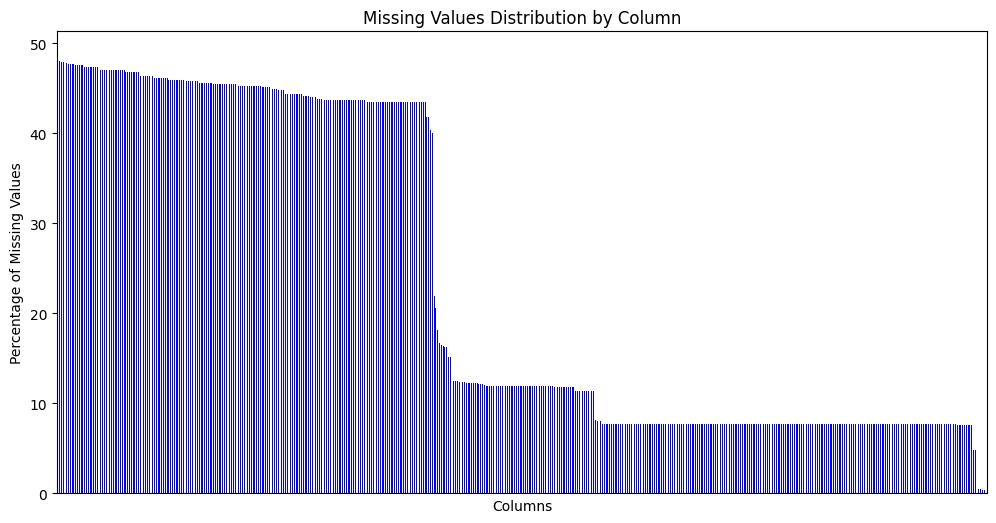

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize new distribution of missing values of our data
missing_values = dropped_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="blue")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution by Column")
plt.xticks([])
plt.show()


By looking at the plot we see that we could probably drop all of the columns that have 40-50% missing values. After removing those, the missing value percentage of the columns left drop drastically to around 10%.

In [32]:
# If a column has more than 50% missing values --> drop it
missing_values_updates = dropped_df.isnull().sum() / len(dropped_df) * 100
cols_missing_updates = missing_values_updates[missing_values_updates > 10]
dropped2_df = dropped_df.drop(columns = cols_missing_updates.index)

print(f"Columns dropped: {len(cols_missing_updates)}")
print(f"New DataFrame shape: {dropped2_df.shape}")

Columns dropped: 300
New DataFrame shape: (6484, 650)


In [34]:
dropped2_df.isnull().sum()

,0
UNITID,0
OPEID,26
OPEID6,26
INSTNM,0
CITY,0
...,...
BBRR4_PP_NOMALE_MAKEPROG,0
BBRR4_PP_NOMALE_PAIDINFULL,0
BBRR4_PP_NOMALE_DISCHARGE,0
CONTROL_PEPS,30


In [36]:
dropped2_df["OPEID"].unique()
dropped2_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE,CONTROL_PEPS,ADDR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,4900 Meridian Street
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,Administration Bldg Suite 1070
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PS,PS,PS,PS,PS,PS,PS,PS,Private Nonprofit,1200 Taylor Rd
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,301 Sparkman Dr
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,915 S Jackson Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,49178301,4270802.0,42708.0,Wilton Simpson Technical College,Brooksville,FL,346134904,Council on Occupational Education,https://hernandoschools.org/schools/stc,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,NaN
6480,49425001,2609404.0,26094.0,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,Proprietary,NaN
6481,49501301,4247201.0,42472.0,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,NaN
6482,49501302,4247202.0,42472.0,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,Public,NaN
